In [53]:
%load_ext autoreload
%autoreload 2
from MODM_Tool_Modules import gathering_data_function as gt
from MODM_Tool_Modules.PROMETHEE_Modules import PROMETHEE_data_processing as pm_process
from MODM_Tool_Modules.PROMETHEE_Modules import PROMETHEE_plotting_results_function as pm_plot
from MODM_Tool_Modules.PROMETHEE_Modules import PROMETHEE_saving_results as pm_save 
from MODM_Tool_Modules.PROMETHEE_Modules import PROMETHEE_sensitivity_analysis as pm_sens

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
decision_matrix, data_filename, weights, normalized_weights, beneficial_criteria, non_beneficial_criteria = gt.gathering_data(
    'C:/Users/Virgi/OneDrive/Bureau/MODM_tool_project/Tool/Data/data_input/optimal_pareto_points.csv')

       Profit (€/h)  Impact on Human Health (DALY/h) · 10  \
Point                                                       
1            566.37                                 2.474   
2           2701.83                                 2.496   
3           4223.16                                 2.518   
4           5381.57                                 2.539   
5           6091.79                                 2.561   
6           6221.99                                 2.583   
7           6271.55                                 2.605   
8           6272.59                                 2.626   
9           6273.62                                 2.648   
10          6274.65                                 2.670   
11          5843.28                                 2.640   
12          5324.84                                 2.624   
13          4575.07                                 2.606   
14          3815.92                                 2.594   
15          3002.12     

In [55]:
user_input = input(
    "Do you want to save the results of this run? (yes/no): ").strip().lower()
directory = None
if user_input == 'yes':
    directory = pm_save.directory_creation(data_filename)

In [59]:
preference_functions = pm_process.define_preference_functions(decision_matrix)

In [72]:
net_flows, ranked_alternatives, ranks = pm_process.PROMETHEE_data_processing(decision_matrix, beneficial_criteria, normalized_weights, preference_functions)

c:\Users\Virgi\OneDrive\Bureau\MODM_tool_project\Tool\Scripts\MODM_Tool_Modules\PROMETHEE_Modules\PROMETHEE_plotting_results_function.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  y='Net Outranking Flow',


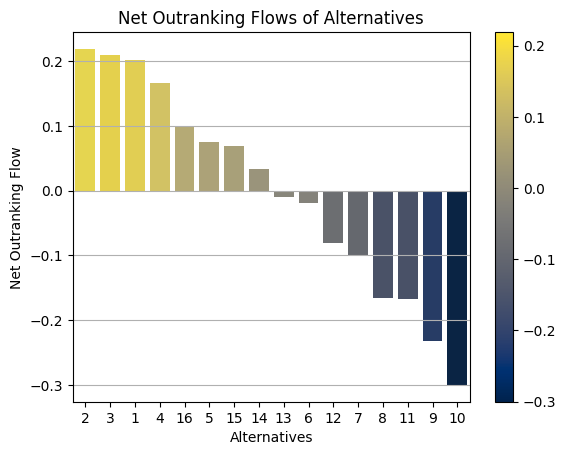

Point
2     0.218958
3     0.209561
1     0.202034
4     0.166859
16    0.098265
5     0.075897
15    0.068373
14    0.033989
13   -0.009556
6    -0.019013
12   -0.080728
7    -0.099034
8    -0.165943
11   -0.167053
9    -0.232563
10   -0.300047
dtype: float64


In [73]:
pm_plot.results_visualization_promethee(net_flows, weights, user_input, directory, ranked_alternatives)

Initial weight for Profit (€/h): 5
Initial weight for Impact on Human Health (DALY/h) · 10: 5
Initial weight for Impact on Ecosystems (species·yr/h) · 10^4: 5
Initial weight for Impact on Resources (USD2013/h) · 10^-4: 5


100%|██████████| 100/100 [00:13<00:00,  7.17it/s]


2
46.0


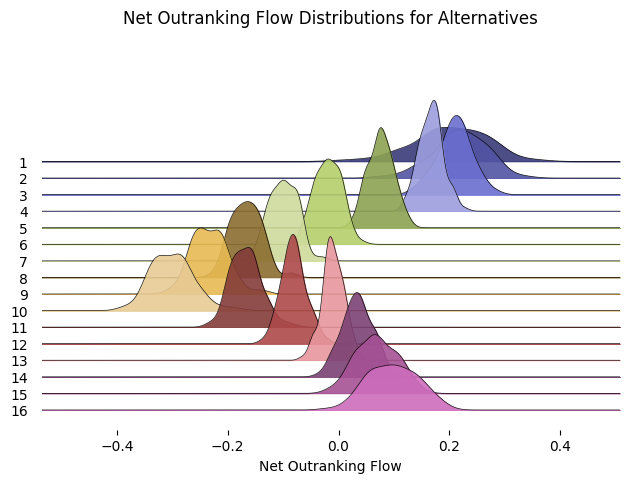

In [74]:
user_input2 = input(
    "Do you want to run a sensitivity analysis? (yes/no): ").strip().lower()
if user_input2 == 'yes':
    uncertainties, net_flows_df, ranks_df, reliability_percentage, initial_best_solution = pm_sens.sensitivity_analysis(pm_process.PROMETHEE_data_processing, weights, 10000, 0, 10, decision_matrix, beneficial_criteria, net_flows, user_input, directory, preference_functions)

In [39]:
if user_input == 'yes':
    pm_save.save_run_results(
        directory,
        decision_matrix,
        preference_functions,
        ranked_alternatives,
        weights,
        beneficial_criteria,
        non_beneficial_criteria,
    )
    
if user_input2 == 'yes' and user_input == 'yes':
    pm_save.save_sensitivity_results(
        directory,
        uncertainties,
        net_flows_df,
        ranks_df,
        reliability_percentage,
        initial_best_solution)